<a href="https://colab.research.google.com/github/pavan-areti/Deep-Learning/blob/main/CenterTrack_Tracking_Objects_as_Points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CenterTrack - Tracking Objects as Points
Simultaneous object detection and tracking using center points:
<img src="https://github.com/xingyizhou/CenterTrack/raw/master/readme/fig2.png">

**Original code :** [CenterTrack](https://github.com/xingyizhou/CenterTrack) by [Xingyi Zhou](https://github.com/xingyizhou)

**[Tracking Objects as Points](http://arxiv.org/abs/2004.01177)**,

Xingyi Zhou, Vladlen Koltun, Philipp Krähenbühl,

*arXiv technical report [(arXiv 2004.01177)](http://arxiv.org/abs/2004.01177)*

**Citation**
```
@article{zhou2020tracking,
  title={Tracking Objects as Points},
  author={Zhou, Xingyi and Koltun, Vladlen and Kr{\"a}henb{\"u}hl, Philipp},
  journal={ECCV},
  year={2020}
}
```

In [ ]:
! nvidia-smi
!/usr/local/cuda/bin/nvcc --version

Fri Jun 10 06:02:01 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Installation
1. Install PyTorch:

In [ ]:
import torch
print(torch.__version__)

1.11.0+cu113


In [ ]:
! pip install torch==1.4.0 torchvision==0.5.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 753.4 MB 6.8 kB/s 
     |████████████████████████████████| 4.0 MB 67.0 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0+cu113
    Uninstalling torch-1.11.0+cu113:
      Successfully uninstalled torch-1.11.0+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.12.0+cu113
    Uninstalling torchvision-0.12.0+cu113:
      Successfully uninstalled torchvision-0.12.0+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.12.0 requires torch==1.11.0, but you have torch 1.4.0 which is incompatible.
torchaudio 0.11.0+cu113 requires torch==1.11.0, but you have torch 1.4.0 which is incompatible.


2. Install [COCOAPI](https://github.com/cocodataset/cocoapi):

In [ ]:
! pip install cython; pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-vvwm42wz
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-vvwm42wz
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=265168 sha256=58a5f17c3a515bc592862c689d165585050582ce028610612045c9de7a0489cb
  Stored in directory: /tmp/pip-ephem-wheel-cache-dswuso8z/wheels/e2/6b/1d/344ac773c7495ea0b85eb228bc66daec7400a143a92d36b7b1
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.4
    Uninstalling pycocotools-2.0.4:
      Successfully uninstalled pycocotools-2.0.4


3. Clone this repo:

In [ ]:
CenterTrack_ROOT="CenterTrack"
! git clone --recursive https://github.com/xingyizhou/CenterTrack $CenterTrack_ROOT
%cd CenterTrack

Cloning into 'CenterTrack'...
remote: Enumerating objects: 285, done.
remote: Total 285 (delta 0), reused 0 (delta 0), pack-reused 285
Receiving objects: 100% (285/285), 15.01 MiB | 27.89 MiB/s, done.
Resolving deltas: 100% (109/109), done.
/content/CenterTrack


You can manually install the [submodules](https://github.com/xingyizhou/CenterTrack/blob/master/.gitmodules) if you forget --recursive.

4. Install the requirements

In [ ]:
! pip install -r requirements.txt
! apt-get install libx264-dev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 312 kB 6.9 MB/s 
     |████████████████████████████████| 161 kB 67.8 MB/s 
     |████████████████████████████████| 7.1 MB 25.3 MB/s 
     |████████████████████████████████| 106 kB 70.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 87 kB 6.7 MB/s 
  Created wheel for progress: filename=progress-1.6-py3-none-any.whl size=9632 sha256=36adf8072a5f495e061a58faa1e76165c79e328e2962ac7b3b2a339753621090
  Stored in directory: /root/.cache/pip/wheels/8e/d7/61/498d8e27dc11e9805b01eb3539e2ee344436fc226daeb5fe87
  Created wheel for pycocotools: filename=pycocotools-2.0.4-cp37-cp37m-linux_x86_64.whl size=265254 sha256=c31b4b8bb50a9f9124869fef722ab6e695a2265a6192703513e5e9297d17c210
  Stored in directory: /root/.cache/pip/wheels/a3/5f/fa/f0

In [ ]:
%ls src/lib/model/networks/

backbones/     dla.py    generic_network.py  resdcn.py
base_model.py  dlav0.py  necks/              resnet.py


In [ ]:
#%rm -r src/lib/model/networks/DCNv2

5. Compile deformable convolutional (from DCNv2).

In [ ]:
# clone if it is not automatically downloaded by `--recursive`.
%%shell

cd src/lib/model/networks/
git clone https://github.com/CharlesShang/DCNv2/  
cd DCNv2/
./make.sh

Cloning into 'DCNv2'...
remote: Enumerating objects: 214, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 214 (delta 47), reused 36 (delta 36), pack-reused 155
Receiving objects: 100% (214/214), 1.40 MiB | 10.49 MiB/s, done.
Resolving deltas: 100% (131/131), done.
running build
running build_ext
building '_ext' extension
creating build
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/content
creating build/temp.linux-x86_64-3.7/content/CenterTrack
creating build/temp.linux-x86_64-3.7/content/CenterTrack/src
creating build/temp.linux-x86_64-3.7/content/CenterTrack/src/lib
creating build/temp.linux-x86_64-3.7/content/CenterTrack/src/lib/model
creating build/temp.linux-x86_64-3.7/content/CenterTrack/src/lib/model/networks
creating build/temp.linux-x86_64-3.7/content/CenterTrack/src/lib/model/networks/DCNv2
creating build/temp.linux-x86_64-3.7/content/CenterTrack/src/lib/model/networks/DCNv2/src
cre

6. Download pertained models for [monocular 3D tracking](https://drive.google.com/open?id=1e8zR1m1QMJne-Tjp-2iY_o81hn2CiQRt), [80-category tracking](https://drive.google.com/open?id=1tJCEJmdtYIh8VuN8CClGNws3YO7QGd40), or [pose tracking](https://drive.google.com/open?id=1tJCEJmdtYIh8VuN8CClGNws3YO7QGd40) and move them to 
`$CenterTrack_ROOT/models/`. 

  More models can be found in [Model zoo](https://github.com/xingyizhou/CenterTrack/blob/master/readme/MODEL_ZOO.md).

In [ ]:
%mkdir models
! gdown --id 1e8zR1m1QMJne-Tjp-2iY_o81hn2CiQRt -O models/nuScenes_3Dtracking.pth
! gdown --id 1tJCEJmdtYIh8VuN8CClGNws3YO7QGd40 -O models/coco_tracking.pth
! gdown --id 1H0YvFYCOIZ06EzAkC2NxECNQGXxK27hH -O models/coco_pose_tracking.pth
! gdown --id 1sf1bWJ1LutwQ_wp176nd2Y3HII9WeFf0 -O models/mot17_half.pth
! gdown --id 1h_8Ts11rf0GQ4_n6FgmCeBuFcWrRjJfa -O models/mot17_fulltrain.pth

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1e8zR1m1QMJne-Tjp-2iY_o81hn2CiQRt
To: /content/CenterTrack/models/nuScenes_3Dtracking.pth
100% 81.8M/81.8M [00:00<00:00, 128MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1tJCEJmdtYIh8VuN8CClGNws3YO7QGd40
To: /content/CenterTrack/models/coco_tracking.pth
100% 79.5M/79.5M [00:00<00:00, 108MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


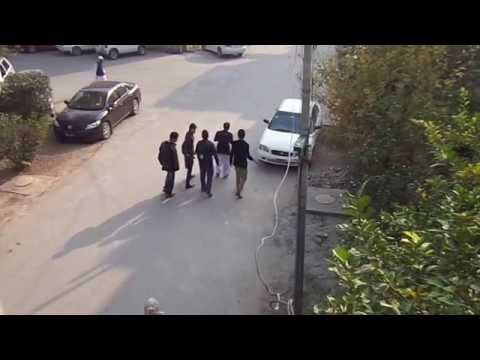

In [ ]:
!pip install youtube-dl
from IPython.display import YouTubeVideo

# YOUTUBE_ID = 'MNn9qKG2UFI'   # car
#YOUTUBE_ID = 'MNn9qKG2UFI'   
YOUTUBE_ID = '2bKXv_XviFc'    # pedestrian 

YouTubeVideo(YOUTUBE_ID)

In [ ]:
#! rm -rf youtube.mp4
# download the youtube with the given ID
! youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube2.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID
# cut the first 5 seconds
! ffmpeg -y -loglevel info -i youtube2.mp4 -t 20 pedestrian.avi
# ! ffmpeg -y -loglevel info -i youtube.mp4 -t 20 road_traffic.mp4

[youtube] 2bKXv_XviFc: Downloading webpage
[youtube] 2bKXv_XviFc: Downloading MPD manifest
[download] youtube2.mp4 has already been downloaded
[download] 100% of 39.22MiB
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --e

## Use CenterTrack

In [ ]:
%cd src/

/content/CenterTrack/src


**Note:**
1. replace "cv2.imshow" in function show_all_image in "debugger.py(/src/lib/utils/)" with "pass"
2. comment out  "cv2.imshow" at line 80 in "demo.py".

Video clip from the [nuScenes dataset](https://www.nuscenes.org/?externalData=all&mapData=all&modalities=Any) in `videos/nuscenes_mini.mp4`. To test monocular 3D tracking on this video, run

In [ ]:
# ! python demo.py tracking,ddd --load_model ../models/nuScenes_3Dtracking.pth --dataset nuscenes --pre_hm --track_thresh 0.1 --demo ../nuscenes_mini.mp4 --test_focal_length 633 --save_video --video_h 480 --video_w 720 --debug 2
! python demo.py tracking,ddd --load_model ../models/nuScenes_3Dtracking.pth --dataset nuscenes --pre_hm --track_thresh 0.1 --demo ../videos/nuscenes_mini.mp4 --test_focal_length 633 --save_video --video_h 450 --video_w 800
#! python demo.py tracking,ddd --load_model ../models/nuScenes_3Dtracking.pth --dataset nuscenes --pre_hm --track_thresh 0.1 --demo road_traffic.avi --save_video

/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:22: FutureWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
Running tracking
Using tracking threshold for out threshold! 0.1
Fix size testing.
training chunk_sizes: [32]
input h w: 448 800
heads {'hm': 10, 'reg': 2, 'wh': 2, 'tracking': 2, 'dep': 1, 'rot': 8, 'dim': 3, 'amodel_offset': 2}
weights {'hm': 1, 'reg': 1, 'wh': 0.1, 'tracking': 1, 'dep': 1, 'rot': 1, 'dim': 1, 'amodel_offset': 1}
head conv {'hm': [256], 'reg': [256], 'wh': [256], 'tracking': [256], 'dep': [256], 'rot': [256], 'dim': [256], 'amodel_offset': [256]}
Creating model...
Using node type: (<class 'model.networks.dla.DeformConv'>, <class 'model.networks.dla.DeformConv'>)
loaded ../models/nuScenes_3Dtracking.pth, epoch 70
out_name nuscenes_mini.mp4
OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / 

You will need to specify test_focal_length for monocular 3D tracking demo to convert the image coordinate system back to 3D. The value 633 is half of a typical focal length (~1266) in nuScenes dataset in input resolution 1600x900. The mini demo video is in an input resolution of 800x448, so we need to use a half focal length. You don't need to set the test_focal_length when testing on the original nuScenes data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Similarly, for 80-category tracking on images/ video, run:

In [ ]:
! python demo.py tracking --load_model ../models/coco_tracking.pth --demo ../videos/nuscenes_mini.mp4 --save_video --video_h 450 --video_w 800

/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:22: FutureWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
Running tracking
Using tracking threshold for out threshold! 0.3
Fix size testing.
training chunk_sizes: [32]
input h w: 512 512
heads {'hm': 80, 'reg': 2, 'wh': 2, 'tracking': 2}
weights {'hm': 1, 'reg': 1, 'wh': 0.1, 'tracking': 1}
head conv {'hm': [256], 'reg': [256], 'wh': [256], 'tracking': [256]}
Creating model...
Using node type: (<class 'model.networks.dla.DeformConv'>, <class 'model.networks.dla.DeformConv'>)
loaded ../models/coco_tracking.pth, epoch 70
Drop parameter base.pre_hm_layer.0.weight.
Drop parameter base.pre_hm_layer.1.weight.
Drop parameter base.pre_hm_layer.1.bias.
Drop parameter base.pre_hm_layer.1.running_mean.
Drop parameter base.pre_hm_layer.1.running_var.
Drop parameter base.pre_hm_layer.1.num_batches_tracked.
out_name 

If you want to test with person tracking models, you need to add --num_class 1:

In [ ]:
! python demo.py tracking --load_model ../models/mot17_half.pth --num_class 1 --demo pedestrian.avi --save_video
#! python demo.py tracking --load_model ../models/mot17_fulltrain.pth --num_class 1 --demo pedestrian.avi --save_video --debug 2

/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:22: FutureWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
Running tracking
Using tracking threshold for out threshold! 0.3
Fix size testing.
training chunk_sizes: [32]
input h w: 512 512
heads {'hm': 1, 'reg': 2, 'wh': 2, 'tracking': 2}
weights {'hm': 1, 'reg': 1, 'wh': 0.1, 'tracking': 1}
head conv {'hm': [256], 'reg': [256], 'wh': [256], 'tracking': [256]}
Creating model...
Using node type: (<class 'model.networks.dla.DeformConv'>, <class 'model.networks.dla.DeformConv'>)
loaded ../models/mot17_half.pth, epoch 70
Drop parameter ltrb_amodal.0.weight.
Drop parameter ltrb_amodal.0.bias.
Drop parameter ltrb_amodal.2.weight.
Drop parameter ltrb_amodal.2.bias.
Drop parameter base.pre_hm_layer.0.weight.
Drop parameter base.pre_hm_layer.1.weight.
Drop parameter base.pre_hm_layer.1.bias.
Drop parameter base.pr

In [ ]:
%%shell
cd ../
pwd
zip -r results.zip results
du -h results.zip
cp results.zip '../drive/My Drive/'

/content/CenterTrack
updating: results/ (stored 0%)
updating: results/trail40.png (deflated 18%)
updating: results/trail31.png (deflated 16%)
updating: results/trail29.png (deflated 16%)
updating: results/trail19.png (deflated 15%)
updating: results/trail27.png (deflated 16%)
updating: results/trail7.png (deflated 11%)
updating: results/trail5.png (deflated 11%)
updating: results/trail13.png (deflated 17%)
updating: results/trail2.png (deflated 12%)
updating: results/trail9.png (deflated 11%)
updating: results/trail30.png (deflated 16%)
updating: results/trail21.png (deflated 15%)
updating: results/trail14.png (deflated 15%)
updating: results/trail18.png (deflated 15%)
updating: results/trail26.png (deflated 17%)
updating: results/trail35.png (deflated 15%)
updating: results/trail39.png (deflated 17%)
updating: results/trail1.png (deflated 14%)
updating: results/trail11.png (deflated 11%)
updating: results/trail10.png (deflated 11%)
updating: results/trail34.png (deflated 16%)
updating

In [ ]:
!

du: cannot access 'results.zip': No such file or directory


You can add --debug 2 to visualize the heatmap and offset predictions.

In [ ]:
! python demo.py tracking --load_model ../models/mot17_half.pth --num_class 1 --debug 2 --demo video.mp4

For monocular 3D tracking, run

In [ ]:
! python demo.py tracking,ddd --demo ../videos/nuscenes_mini.mp4.mp4 --load_model ../models/coco_tracking.pth --save_video --test_focal_length 633

/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:22: FutureWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
Running tracking
Using tracking threshold for out threshold! 0.3
Fix size testing.
training chunk_sizes: [32]
input h w: 448 800
heads {'hm': 10, 'reg': 2, 'wh': 2, 'tracking': 2, 'dep': 1, 'rot': 8, 'dim': 3, 'amodel_offset': 2}
weights {'hm': 1, 'reg': 1, 'wh': 0.1, 'tracking': 1, 'dep': 1, 'rot': 1, 'dim': 1, 'amodel_offset': 1}
head conv {'hm': [256], 'reg': [256], 'wh': [256], 'tracking': [256], 'dep': [256], 'rot': [256], 'dim': [256], 'amodel_offset': [256]}
Creating model...
Using node type: (<class 'model.networks.dla.DeformConv'>, <class 'model.networks.dla.DeformConv'>)
loaded ../models/coco_tracking.pth, epoch 70
Skip loading parameter hm.2.weight, required shapetorch.Size([10, 256, 1, 1]), loaded shapetorch.Size([80, 256, 1, 1]).
Ski

Similarly, for pose tracking, run:

In [ ]:
! python demo.py tracking,multi_pose --load_model ../models/coco_pose.pth --demo video.mp4

## Training on custom dataset
If you want to train CenterTrack on your own dataset, you can use `--dataset custom` and manually specify the annotation file, image path, input resolutions, and number of categories. You still need to create the annotation files in COCO format (referring to the many `convert_X_to_coco.py` examples in tools). For example, you can use the following command to train on our [mot17 experiment](https://github.com/xingyizhou/CenterTrack/blob/master/experiments/mot17_half_sc.sh) without using the pre-defined mot dataset file:

In [ ]:
! python main.py tracking --exp_id mot17_half_sc --dataset custom --custom_dataset_ann_path ../data/mot17/annotations/train_half.json --custom_dataset_img_path ../data/mot17/train/ --input_h 544 --input_w 960 --num_classes 1 --pre_hm --ltrb_amodal --same_aug --hm_disturb 0.05 --lost_disturb 0.4 --fp_disturb 0.1 --gpus 0

## Benchmark Evaluation and Training
After installation, follow the instructions in [DATA.md](https://github.com/xingyizhou/CenterTrack/blob/master/readme/DATA.md) to setup the datasets. Then check [GETTING_STARTED.md](https://github.com/xingyizhou/CenterTrack/blob/master/readme/GETTING_STARTED.md) to reproduce the results in the paper. We provide scripts for all the experiments in the [experiments folder](https://github.com/xingyizhou/CenterTrack/blob/master/experiments).

### **Benchmark evaluation**
First, download the models you want to evaluate from our model zoo and put them in CenterTrack_ROOT/models/.

**MOT17**

To test the tracking performance on MOT17 with our pretrained model, run

In [ ]:
! python test.py tracking --exp_id mot17_half --dataset mot --dataset_version 17halfval --pre_hm --ltrb_amodal --track_thresh 0.4 --pre_thresh 0.5 --load_model ../models/mot17_half.pth

This will give a MOTA of `66.1` if set up correctly. `--pre_hm` is to enable the input heatmap. `--ltrb_amodal` is to use the left, top, right, bottom bounding box representation to enable detecting out-of-image bounding box (We observed this is important for MOT datasets). And `--track_thresh` and `--pre_thresh` are the score threshold for predicting a bounding box ($\theta$ in the paper) and feeding the heatmap to the next frame ($\tau$ in the paper), respectively.

To test with public detection, run

In [ ]:
! python test.py tracking --exp_id mot17_half_public --dataset mot --dataset_version 17halfval --pre_hm --ltrb_amodal --track_thresh 0.4 --pre_thresh 0.5 --load_model ../models/mot17_half.pth --public_det --load_results ../data/mot17/results/val_half_det.json

The expected MOTA is `63.1`.

To test on the test set, run

### Training
We have packed all the training scripts in the [experiments folder](https://github.com/xingyizhou/CenterTrack/blob/master/experiments). The experiment names correspond to the model name in the [model zoo](https://github.com/xingyizhou/CenterTrack/blob/master/experiments). The number of GPUs for each experiment can be found in the scripts and the model zoo. If the training is terminated before finishing, you can use the same command with `--resume` to resume training. It will found the latest model with the same `exp_id`. Some experiments rely on pretraining on another model. In this case, download the pretrained model from our model zoo or train that model first.